# Optimum growth temperature. Data retrieved on 09/27/2022 from [Tempura database](http://togodb.org/db/tempura)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.legend import Legend

In [2]:
from skbio import TreeNode

In [3]:
plt.rcParams.update({
    'figure.autolayout': True,
    'savefig.bbox': 'tight',
    'svg.fonttype': 'none',
    'font.sans-serif': 'Arial',
    'font.size': 11,
    'boxplot.medianprops.linewidth': 2,
    'boxplot.flierprops.markeredgecolor': 'none',
    'boxplot.flierprops.markersize': 5})

In [4]:
# %matplotlib notebook

Load data

In [5]:
df = pd.read_table('../phylogeny/place/fine_all.tsv', index_col = 0)
df.shape

(5380, 22)

Load tree

In [6]:
tree = TreeNode.read('../phylogeny/place/fine_all.nwk')
tree.count(tips = True)

5380

Load temperature data

In [7]:
dt = pd.read_table('tempura.csv', sep = ',')
dt.shape

(8639, 20)

**We will use the average optimal temperature (`Topt_ave`)**

## Match data

By `taxonomy_id`

In [8]:
dtemp = dt[['taxonomy_id', 'Topt_ave']].set_index('taxonomy_id')
dtemp.head()

,Topt_ave
taxonomy_id,
2320,100.0
1927912,106.0
54252,106.0
1609559,105.0
2320,98.0


In [9]:
topt = {'taxid' + str(k): v for k, v in dtemp.to_dict()['Topt_ave'].items()}

In [10]:
df[df.index.isin(topt)].shape

(3431, 22)

By `name`

In [11]:
dtemp = dt[['genus_and_species', 'Topt_ave']].set_index('genus_and_species')
dtemp.head()

,Topt_ave
genus_and_species,
Methanopyrus kandleri,100.0
"""Geogemma barossii""",106.0
Pyrolobus fumarii,106.0
Pyrococcus kukulkanii,105.0
Methanopyrus kandleri,98.0


In [12]:
spnames = dtemp.to_dict()['Topt_ave']

In [13]:
df['species'].isin(spnames).value_counts()

True     3251
False    2129
Name: species, dtype: int64

**Therefore, it is better to match by `taxonomy_id`**

In [14]:
df['topt'] = df.index.to_series().map(topt)

In [15]:
df_temp = df[df['topt'].notna()]
df_temp.shape

(3431, 23)

Save data to calculate phylogenetic signal

In [16]:
df_temp.to_csv('../phylogeny/place/fine_all_temperature.tsv', sep = '\t')

## Prune tree to contain only data points with temperature

In [17]:
placed = tree.copy()

In [18]:
placed = placed.shear(df_temp.index)
placed.prune()

In [19]:
placed.count(tips = True)

3431

Export tree

In [20]:
placed.write('../phylogeny/place/fine_all_temperature.nwk')

'../phylogeny/place/fine_all_temperature.nwk'

Histogram

<IPython.core.display.Javascript object>


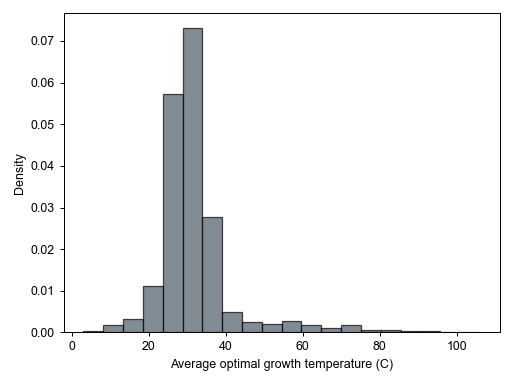

In [21]:
plt.figure()
plt.hist(df_temp['topt'], bins = 20, density = True,
        color = '#4c5c68', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Average optimal growth temperature (C)')
plt.ylabel('Density')
plt.show()

**It makes sense that the average optimal growth temperature resembles a gaussian curve beccause of the central limit theorem. Remember the actual variable is an average!**

<IPython.core.display.Javascript object>


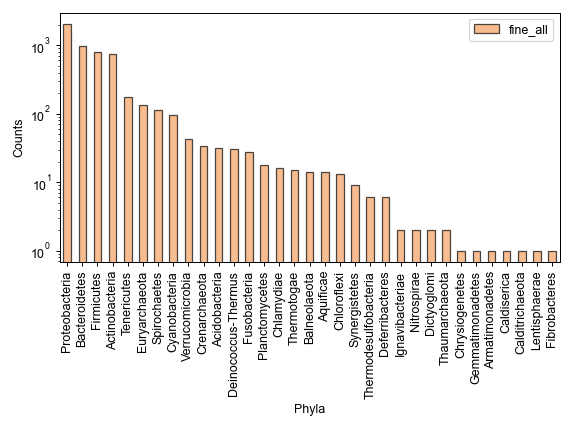

In [22]:
plt.figure()
df['phylum'].value_counts().plot.bar(color = '#f4a261', edgecolor = 'black', alpha = 0.7, label = 'fine_all')
plt.xlabel('Phyla')
plt.ylabel('Counts')
plt.yscale('log')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


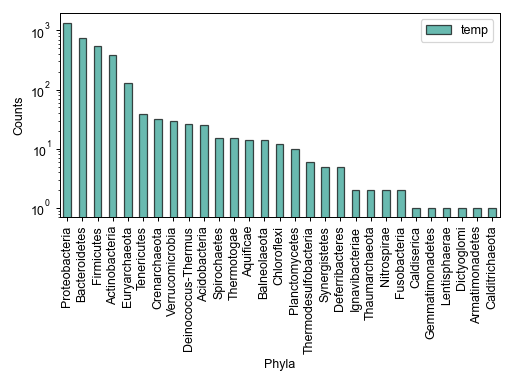

In [23]:
plt.figure()
df_temp['phylum'].value_counts().plot.bar(color = '#2a9d8f', edgecolor = 'black', alpha = 0.7, label = 'temp')
plt.xlabel('Phyla')
plt.ylabel('Counts')
plt.yscale('log')
plt.legend()
plt.show()

**Phyla representation is the same as in our dataset but Cyanobacteria is not present in the Tempura database (only one entry)**